In [114]:
 # imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
import seaborn as sns
from pathlib import Path
from dotenv import load_dotenv

In [115]:
# Import Data
production_path = Path("../data/Total_Energy_Production.csv")
consumption_path = Path("../data/Total_Energy_Use.csv")
Total_Energy_Nominal_Path = Path("../data/Total_Energy_Nominal_Prices.csv")
Renewable_Consumption_path = Path("../data/Renewable_Energy_Consumption.csv")
Renewable_Path = Path("../data/Renewable_Production.csv")

production_data = pd.read_csv(production_path)
consumption_data = pd.read_csv(consumption_path)
renewable_consumption = pd.read_csv(Renewable_Consumption_path, index_col="Year")
renewable_production_data = pd.read_csv(Renewable_Path, index_col="Year")
Total_Energy_Nominal_data = pd.read_csv(Total_Energy_Nominal_Path)
Prod_Price_combined_df = pd.concat([production_data, Total_Energy_Nominal_data], axis="columns", join="inner")
Consu_Price_combined_df = pd.concat([consumption_data, Total_Energy_Nominal_data], axis="columns", join="inner")
Consu_Prod_combined_df = pd.concat([consumption_data, production_data], axis="columns", join="inner")

In [139]:
# Define Panel Visualization Functions

def Production_plot():
    """Production Plot"""
    
    Production = production_data.loc[:, [ 'Year','Crude Oil and Lease Condensate quads', 'Natural Gas Plant Liquids quads', 'Coal quads', 'Nuclear quads', 'Hydropower quads', 'Other Renewable Energy quads']]

    return Production.hvplot.line(x='Year', y=['Crude Oil and Lease Condensate quads', 'Natural Gas Plant Liquids quads', 'Coal quads', 'Nuclear quads','Hydropower quads','Other Renewable Energy quads']).opts(title="Production", width=800)

def Production_bargraph():
    """Production Bargraph"""

    Production = production_data.loc[:, [ 'Year','Crude Oil and Lease Condensate quads', 'Natural Gas Plant Liquids quads', 'Coal quads', 'Nuclear quads', 'Hydropower quads', 'Other Renewable Energy quads']]

    return Production.hvplot.bar(x='Year', y=['Crude Oil and Lease Condensate quads', 'Natural Gas Plant Liquids quads', 'Coal quads', 'Nuclear quads','Hydropower quads','Other Renewable Energy quads'], height=600, width=800, rot=90)

def Consumption_linegraph():
    """Consumption Line Graph"""

    consumption = consumption_data.loc[:,['Year','Liquid Fuels quads', 'Natural Gas quads','Coal quads', 'Nuclear quads', 'Hydropower quads', 'Other Renewable Energy quads']]

    return consumption.hvplot.line(x='Year', y=[ 'Liquid Fuels quads', 'Natural Gas quads','Coal quads', 'Nuclear quads','Hydropower quads','Other Renewable Energy quads']).opts(title="Consumption Line", width=800)

def Consumption_Bargraph():
    """Consumption Bar Graph"""

    consumption = consumption_data.loc[:,['Year','Liquid Fuels quads', 'Natural Gas quads','Coal quads', 'Nuclear quads', 'Hydropower quads', 'Other Renewable Energy quads']]

    return consumption.hvplot.bar(x='Year', y=['Liquid Fuels quads', 'Natural Gas quads','Coal quads', 'Nuclear quads','Hydropower quads','Other Renewable Energy quads'], height=600, width=800, rot=90)

def Nonrenewable_Production():
    """Non-renewable Production"""

    Production = production_data.loc[:, [ 'Year','Crude Oil and Lease Condensate quads', 'Natural Gas Plant Liquids quads', 'Coal quads', 'Nuclear quads']]

    return Production.hvplot.line(x='Year', y=['Crude Oil and Lease Condensate quads', 'Natural Gas Plant Liquids quads', 'Coal quads', 'Nuclear quads'], title='Non-renewable Energy Production')

def Renewable_Production():
    """Renewable Production"""

    Production = production_data.loc[:, ['Year','Hydropower quads', 'Biomass quads',	'Other Renewable Energy quads']]

    return Production.hvplot.line(x='Year', y=['Hydropower quads','Biomass quads',	'Other Renewable Energy quads'], title='Renewable Energy Production')

def Renewable_Energy_Barchart():
    """Renewable Energy Barchart"""

    Production = production_data.loc[:, ['Year','Hydropower quads', 'Biomass quads',	'Other Renewable Energy quads']]

    return Production.hvplot.bar(
    title= "Renewable Energy Production", 
    x='Year', 
    y=['Hydropower quads', 'Biomass quads', 'Other Renewable Energy quads'], height=500, width=800, rot=90

)

def Renewable_Consumption_Line():
    """Renewable Consumption Line"""

    consumption = consumption_data.loc[:,['Year','Hydropower quads', 'Biomass quads', 'Other Renewable Energy quads' ]]

    return consumption.hvplot.line(
    title= "Renewable Energy Consumption", 
    x='Year', 
    y=[ 'Hydropower quads','Biomass quads', 'Other Renewable Energy quads']

)

def Nonrenewable_Consumption_Line():
    """Non-renewable Consumption Line"""

    consumption = consumption_data.loc[:,['Year','Liquid Fuels quads', 'Natural Gas quads','Coal quads', 'Nuclear quads']]

    return consumption.hvplot.line(
    title= "Non-renewable Energy Consumption", 
    x='Year', 
    y=[ 'Liquid Fuels quads', 'Natural Gas quads','Coal quads', 'Nuclear quads']

)

def Correlation_Heatmap():
    """Correlation Heatmap"""

    nonrenewable_production = production_data.loc[:, ['Crude Oil and Lease Condensate quads', 'Natural Gas Plant Liquids quads', 'Dry Natural Gas quads', 'Coal quads','Nuclear quads', 'Other quads']]

    Energy_Price = Total_Energy_Nominal_data.loc[:, ['West Texas Intermediate (nom $/b) nom $/b', 'Gas Price at Henry Hub (nom $/MMBtu) nom $/MMBtu', 'Coal at Minemouth (nom $/ton) nom $/ton', 'Electricity (nom cents/kWh) nom cents/kWh']]

    Prod_Price_combined_df = pd.concat([nonrenewable_production, Energy_Price], axis="columns", join="inner")

    Prod_Price_correlation = Prod_Price_combined_df.corr()

    fig = plt.Figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    sns.heatmap(Prod_Price_correlation, vmin=-1, vmax=1, ax=ax)

    return pn.pane.Matplotlib(fig)

In [140]:
consumption_data = consumption_data.iloc[20:-1]
production_data = production_data.iloc[15:-1]

welcome_tab = pn.Column('#Energy', Correlation_Heatmap(), Production_plot())
renewable_column = pn.Column(Production_bargraph(), Consumption_linegraph(), Consumption_Bargraph())
renewable_graphs = pn.Column('Renewable Energy', renewable_column)
column = pn.Column('Non-Renewable Energy', Nonrenewable_Production(), Renewable_Production(), Renewable_Energy_Barchart(), Renewable_Consumption_Line(), Nonrenewable_Consumption_Line())
panel = pn.Tabs(
    ("Welcome", welcome_tab),
    ("Renewable Energy", renewable_graphs),
    ("Non-Renewable Energy", column))

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Matplotlib(Figure)
        [2] HoloViews(NdOverlay)
    [1] Column
        [0] Markdown(str)
        [1] Column
            [0] HoloViews(Bars)
            [1] HoloViews(NdOverlay)
            [2] HoloViews(Bars)
    [2] Column
        [0] Markdown(str)
        [1] HoloViews(NdOverlay)
        [2] HoloViews(NdOverlay)
        [3] HoloViews(Bars)
        [4] HoloViews(NdOverlay)
        [5] HoloViews(NdOverlay)
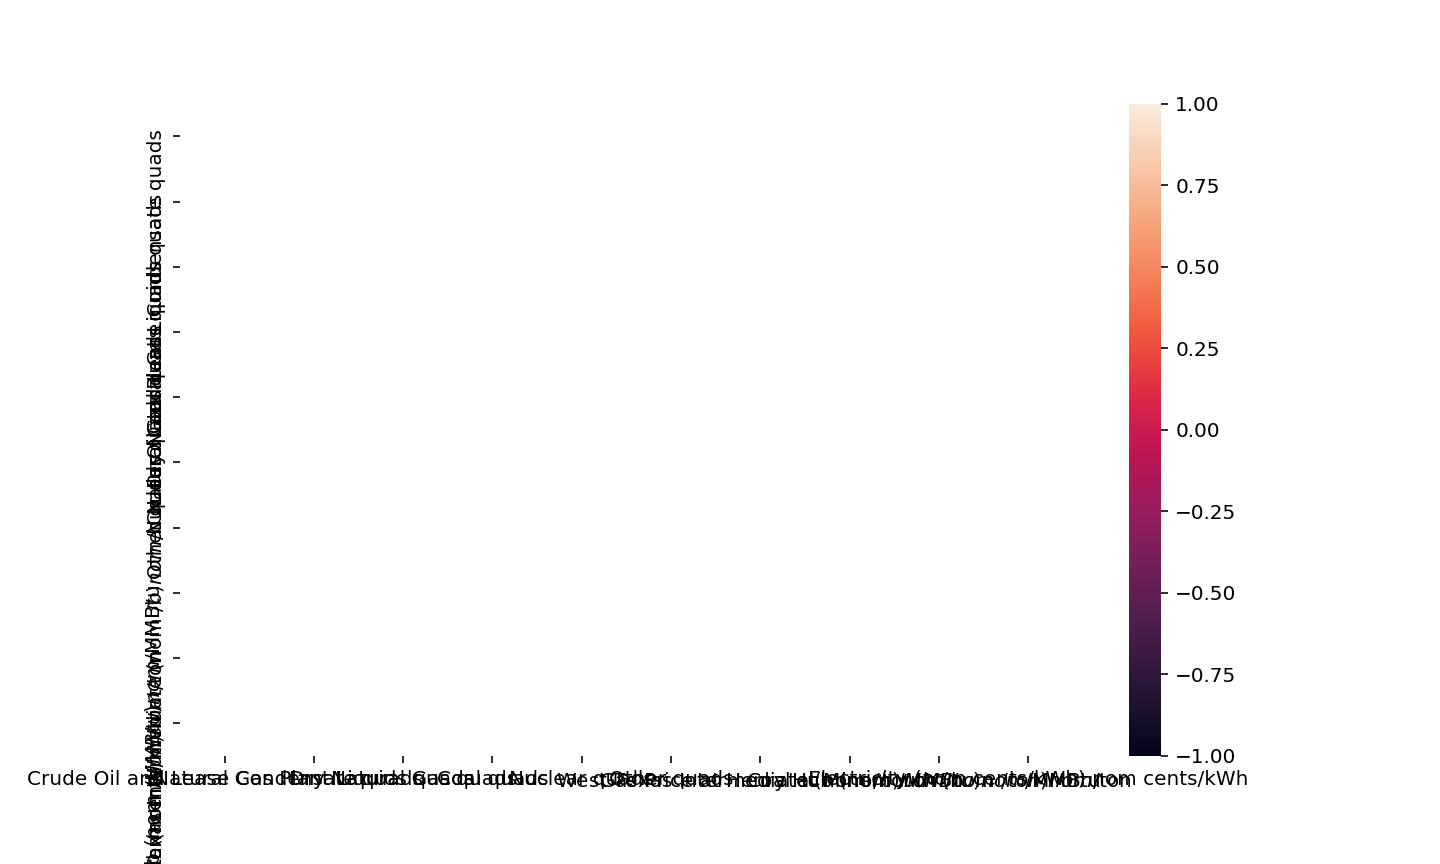

In [141]:
panel.servable()